In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = 't'

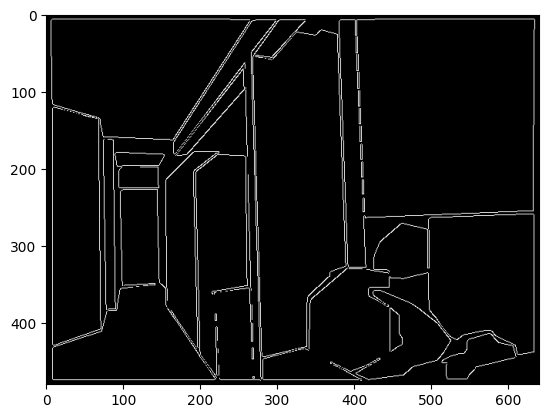

In [4]:
# Carregar a imagem
img = cv2.imread(path+'.png')
# Converter para escala de cinza
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detectar as arestas
edges = cv2.Canny(img_gray, 100, 200)
# Mostrar as arestas
plt.imshow(edges, cmap="gray")


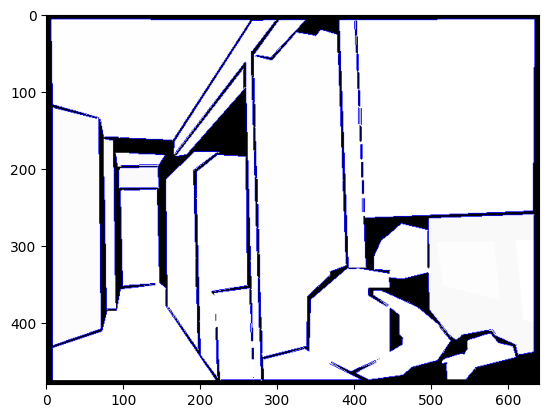

In [5]:

#Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(100)

#Detect lines in the image
lines = lsd.detect(img_gray)[0] #Position 0 of the returned tuple are the detected lines

#Draw detected lines in the image
drawn_img = lsd.drawSegments(img,lines)

plt.show(plt.imshow(drawn_img))

In [6]:
lines

array([[[260.95337  , 350.6532   , 258.81107  , 185.63232  ]],

       [[419.1417   , 473.86246  , 463.114    , 468.04196  ]],

       [[226.875    , 474.3688   , 278.12598  , 474.41052  ]],

       [[259.06537  ,  96.88312  , 264.8968   , 319.39407  ]],

       [[280.625    , 474.37234  , 408.12527  , 474.40005  ]],

       [[146.91817  , 348.15305  , 144.1014   , 226.88135  ]],

       [[414.30203  , 263.83694  , 631.797    , 254.96266  ]],

       [[414.9249   , 326.96317  , 411.97958  , 261.81375  ]],

       [[632.07733  , 254.36784  , 633.76685  ,   6.8623157]],

       [[519.3878   , 453.12485  , 519.6168   , 471.8873   ]],

       [[576.9529   , 413.40057  , 548.03906  , 421.57095  ]],

       [[ 70.96719  , 406.88516  ,  67.93065  , 135.61319  ]],

       [[194.50925  , 204.37294  , 194.55937  , 238.12659  ]],

       [[385.1785   , 139.34554  , 392.10114  , 328.1167   ]],

       [[199.35524  , 399.37524  , 199.90382  , 441.90042  ]],

       [[140.63625  , 350.72183  ,  96.8

In [7]:
# desenhar os pontos de intersecção das arestas com a reta de varredura

lines = lines.reshape((-1,4))

lines.shape

(200, 4)

In [8]:
def plot_points_of_lines(lines):
    for line in lines:
        plt.plot(line[0], line[1], 'ro')
        plt.plot(line[2], line[3], 'ro',color='green')
    plt.show()

C:\Users\emanu\AppData\Local\Temp\ipykernel_19924\2938091603.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(line[2], line[3], 'ro',color='green')


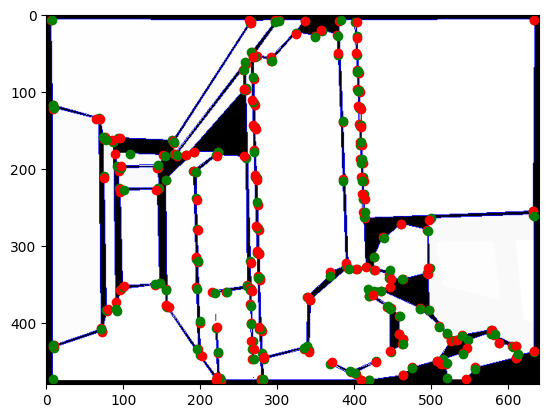

In [9]:
# plotar imagem e os pontos por cima

drawn_img = lsd.drawSegments(img,lines)

plt.imshow(drawn_img)

plot_points_of_lines(lines)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\emanu\AppData\Local\Temp\ipykernel_19924\2938091603.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(line[2], line[3], 'ro',color='green')


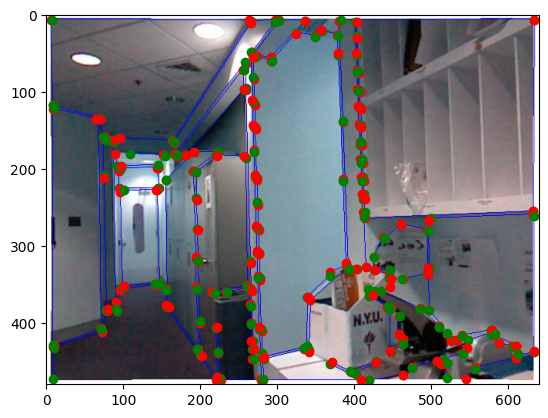

In [10]:
# read image from file with matplotlib

img_ori = plt.imread(path+'-color.png')

plt.imshow(img_ori)
# plotar imagem e os pontos por cima

drawn_img = lsd.drawSegments(img_ori,lines)

plt.imshow(drawn_img)

plot_points_of_lines(lines)

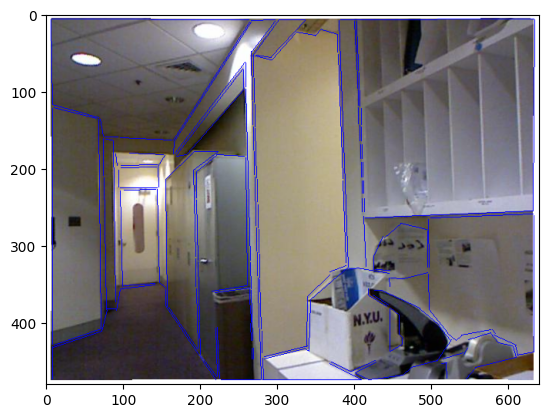

In [11]:
# Carregar a imagem
img_ori = cv2.imread(path+"-color.png")

img_gray_ori = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(100)

#Detect lines in the image
lines = lsd.detect(img_gray)[0] #Position 0 of the returned tuple are the detected lines

#Draw detected lines in the image
drawn_img = lsd.drawSegments(img_ori,lines)

plt.show(plt.imshow(drawn_img))

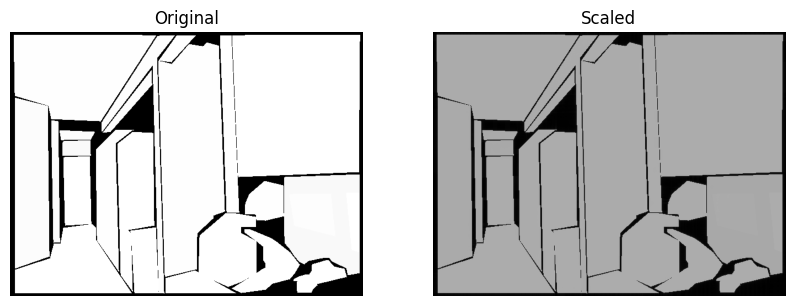

In [12]:
# Import NumPy and PIL libraries
import numpy as np

def fft_upscaling(img_gray,scale=4):
    # Perform FFT on the image
    im_fft = np.fft.fft2(img_gray)

    # Shift the zero-frequency component to the center of the spectrum
    im_fft = np.fft.fftshift(im_fft)

    # Create a new array with the desired output size and fill it with zeros
    height, width = img_gray.shape
    out = np.zeros((height * scale, width * scale), dtype=complex)

    # Copy the shifted FFT array to the center of the new array
    out[height * (scale - 1) // 2 : height * (scale + 1) // 2, width * (scale - 1) // 2 : width * (scale + 1) // 2] = im_fft

    # Shift the zero-frequency component back to the corners of the spectrum
    out = np.fft.ifftshift(out)

    # Perform inverse FFT on the new array
    out = np.fft.ifft2(out)

    # Take the absolute value of the output array
    out = np.abs(out)

    # Normalize the output array to the range [0, 255]
    out = out / out.max() * 255

    return out

img_big = fft_upscaling(img_gray,scale=4)

# Plot the original and the scaled image

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.axis('off')
plt.title('Original')
plt.imshow(img_gray, cmap='gray')
plt.subplot(122)
plt.axis('off')
plt.title('Scaled')
plt.imshow(img_big, cmap='gray')

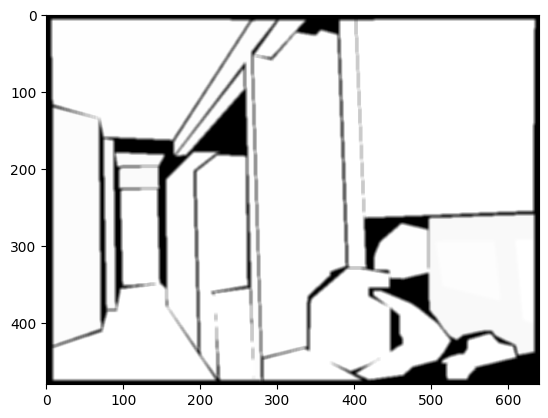

In [17]:


dst = cv2.GaussianBlur(img_gray, (5,5),cv2.BORDER_DEFAULT)

plt.imshow(dst, cmap='gray')

In [18]:
import cv2
# carregar imagem de entrada
# criar objeto DnnSuperResImpl
sr = cv2.dnn_superres.DnnSuperResImpl_create()
# definir modelo do filtro da AMD Super Resolution
sr.setModel('fsr', 'uq') # ultra quality
# aplicar filtro na imagem de entrada
result = sr.upscale(img_gray)
# salvar imagem de saída
cv2.imwrite('output.jpg', result)


AttributeError: module 'cv2' has no attribute 'dnn_superres'

In [19]:
cv2.__version__

'4.7.0'

In [14]:
# export img_big to png file

cv2.imwrite('img_big.png', img_big)

True

In [15]:
img_big = cv2.resize(img_gray,dsize=None,fx=4,fy=4)


cv2.imwrite('img_big2.png', img_big)

True